Aaron Leung <br>
ahleung2 <br>
leung.aa@northeastern.edu


# CS6220 Homework 4


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1

### 1a) Implement a simple k-means algorithm in Python on Colab

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/f150_motor_distributors.txt", header=None)
df

,0,1
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


In [3]:
import numpy as np

data = df.to_numpy()
data

array([[-11.96999577,  -8.03962819],
       [-26.96141582,  -6.96210943],
       [-12.91584891,  -1.37894148],
       ...,
       [ 12.92550271,  -0.10319682],
       [-34.33677838,   4.4057531 ],
       [-26.81273855,  -1.63995599]])

In [4]:
"""
Helper function to calculate the euclidean distance
"""
def get_distance(point_1, point_2):
        return ((point_1[0] - point_2[0]) **2 + (point_1[1] - point_2[1]) **2) ** 0.5

In [5]:
# testing helper function
get_distance([2,0], [4,5])

5.385164807134504

In [6]:
"""
Creating KMeans class that includes constructor and method fit
"""
class KMeans:
    """
    constructor that sets k equal to specified input and max iteration to 100
    """
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations

    """
    fit function contains the following main steps:
    1) initialize centroids
    2) assign each point to the closest centroid
    3) update centroids
    4) repeat steps 2 and 3 max_iterations
    5) calculate labels
    """
    def fit(self, data):
        self.centroids = np.array([[10,10], [-10,-10],[2, 2], [3, 3], [-3, -3]])

        for i in range(self.max_iterations):
            # create empty list, one for each cluster (5 total)
            clusters = [[] for count in range(self.k)]

            # Assign each data point to the closest centroid
            for point in data:
                # calculate the distance between each point to each centroid, store in list
                distances = [get_distance(point, centroid) for centroid in self.centroids]

                # argmin returns the indices of the minimum value (distances)
                # this index corresponds to the closest cluster
                index = np.argmin(distances)

                # assign point to closest cluster
                clusters[index].append(point)
            
            # Update the centroids to the mean of their assigned data points
            for j in range(self.k):
                self.centroids[j] = np.mean(clusters[j], axis=0)
        
        # creating labels for each point in the dataset
        self.labels = []
        for point in data:
          distances = [get_distance(point, centroid) for centroid in self.centroids]
          index = np.argmin(distances)
          self.labels.append(index)



### 1b) Scatter the results in two dimensions with different clusters as different colors. 

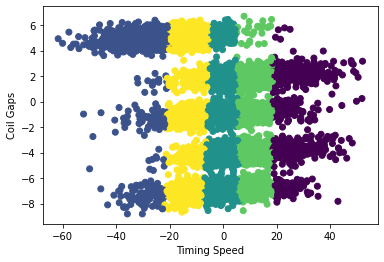

In [7]:
# Creating instance of KMeans and calling fit method
kmeans = KMeans(k=5)
kmeans.fit(data)

# Storing the labels assigned to each point
predictions = kmeans.labels

# Visualize the clusters
import matplotlib.pyplot as plt

# color based on labels (predictions)
plt.scatter(data[:, 0], data[:, 1], c=predictions)
plt.xlabel("Timing Speed")
plt.ylabel("Coil Gaps")
plt.show()


In [8]:
# Checking centroids after max_iterations
kmeans.centroids

array([[ 26,  -1],
       [-30,   2],
       [  0,  -2],
       [ 11,  -1],
       [-12,   0]])

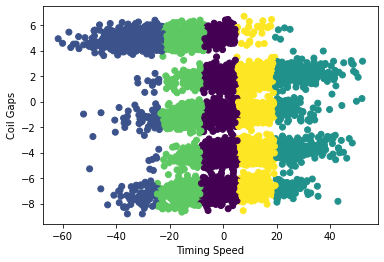

In [9]:
# Verifying results from 1b) with sklearn
from sklearn.cluster import KMeans

Cluster = KMeans(n_clusters=5)
Cluster.fit(data)
predictions_sklearn = Cluster.predict(data)
plt.xlabel("Timing Speed")
plt.ylabel("Coil Gaps")
plt.scatter(data[:,0], data[:, 1], c=predictions_sklearn)

### 1c) You will notice that in the above, there are only five initialization clusters. Why is k = 5 a logical choice for this dataset? After plotting your resulting clusters, what do you notice? Did it cluster very well? Is there an initialization that would make it cluster well?

Based on the problem description, we know that the data includes the timing speed and ignition coil gaps for production over the years 1996, 1999, 2006, 2015 and 2022.  In other words, 5 distinct years.  Therefore, it is reasonable to expect 5 different clusters and thus k = 5 is a logical choice for this dataset.  

I think using the euclidean distance in kmeans clustering does not result in optimal clustering.  An important property and goal of kmeans clustering is that the data points from different clusters should be as different as possible.  However, based on the clustering as shown in the graphs above, it is difficult to extract any meaningful data.  For instance, the turqoise and dark blue points in the top most cluster have similar properties: they both have high values for coil gaps and timing speed respectively.

To test whether there is a better initialization, I will calculate the initial centroids using KMeans++ by using sklearn library.  The benefits of using KMeans++ is that it attempts to spread out the initial centroids.  I will then use these newly calculate centroids to create a new scatter plot and see how well it clusters.  

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

kmeans_plus = KMeans(n_clusters=5, init='k-means++')

kmeans_plus.fit(data)

centroids_plus = kmeans_plus.cluster_centers_

In [11]:
# Printing out 5 new centroids
centroids_plus

array([[ 11.67968701,  -1.68998358],
       [-31.99173589,   2.60523378],
       [-14.55648626,  -0.53454495],
       [ 27.35392694,  -1.09471392],
       [ -1.05933776,  -2.28033535]])

In [30]:
"""
KMeans using centroids generated from Kmeans++
"""
class KMeans_plus:
    # constructor that sets k equal to specified input and max iteration to 100
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations

    def fit(self, data):
        self.centroids = np.array([[11.67968701,  -1.68998358], [-31.99173589,   2.60523378],[-14.55648626,  -0.53454495], [27.35392694,  -1.09471392], [-1.05933776,  -2.28033535]])
        for i in range(self.max_iterations):
            # create empty list, one for each cluster (5 total)
            clusters = [[] for count in range(self.k)]

            # Assign each data point to the closest centroid
            for point in data:
                # calculate the distance between each point to each centroid, store in list
                distances = [get_distance(point, centroid) for centroid in self.centroids]

                # argmin returns the indices of the minimum value (distances)
                # this index corresponds to the closest cluster
                index = np.argmin(distances)

                # assign point to closest cluster
                clusters[index].append(point)
            
            # Update the centroids to the mean of their assigned data points
            for j in range(self.k):
                self.centroids[j] = np.mean(clusters[j], axis=0)
        
        # creating labels for each point in the dataset
        self.labels = []
        for point in data:
          distances = [get_distance(point, centroid) for centroid in self.centroids]
          index = np.argmin(distances)
          self.labels.append(index)



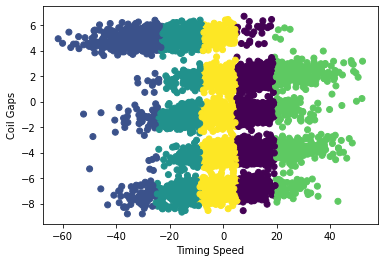

In [31]:
"""
Plotting scatter plot and comparing it to results in 1b)
"""
kmeans_plus = KMeans_plus(k=5)
kmeans_plus.fit(data)

predictions_plus = kmeans_plus.labels

# Visualize the clusters
import matplotlib.pyplot as plt
plt.xlabel("Timing Speed")
plt.ylabel("Coil Gaps")
plt.scatter(data[:, 0], data[:, 1], c=predictions_plus)
plt.show()

If we compare the two scatterplots (initial initialization and new initialization), we can see that the clusters do not change.  Therefore, I think we can conclude that there is not a better initialization that would make it cluster well.  

## Question 2

### 2a) Using the same data as Question 1 and the same initialization instances {x1, x2, x3, x4, x5} implement a specialized k-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors.

In [14]:
"""
@ is the matrix multiplication operator
Function that calculates mahalanobis distance
"""
import numpy
from math import sqrt
def mahalanobis_distance(x, y, matrixP_prime):
  distance = ((x-y).T @ matrixP_prime @ (x-y))
  return distance

In [15]:
"""
Creating modified KMeans class that uses mahalanobis distance
"""
class KMeans_mahalanobis:
    # constructor that sets k equal to specified input and max iteration to 100
    def __init__(self, k, matrixP_prime, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        self.matrixP_prime = matrixP_prime

    def fit_m(self, data):
        self.centroids = np.array([[10.0,10.0], [-10.0,-10.0],[2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

        for i in range(self.max_iterations):
            # create empty list, one for each cluster (5 total)
            clusters = [[] for count in range(self.k)]

            # Assign each data point to the closest centroid
            for point in data:
                # calculate the distance between each point to each centroid, store in list
                distances = [mahalanobis_distance(point, centroid, self.matrixP_prime) for centroid in self.centroids]

                # argmin returns the indices of the minimum value (distances)
                # this index corresponds to a closet cluster
                index = np.argmin(distances)

                # assign point to closest cluster
                clusters[index].append(point)
            
            # Update the centroids using mean 
            for j in range(self.k):
                self.centroids[j] = np.mean(clusters[j], axis=0)

        # creating labels for each point in the dataset
        self.labels = []
        for point in data:
          distances = [mahalanobis_distance(point, centroid, self.matrixP_prime) for centroid in self.centroids]
          index = np.argmin(distances)
          self.labels.append(index)
        
        # returning clusters
        return clusters



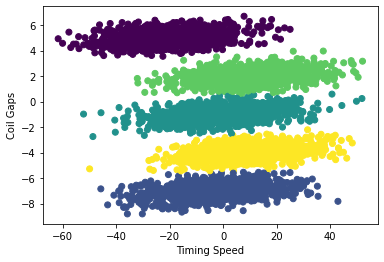

In [16]:
"""
Graphing scatter plot of kmeans using mahalanobis distance
"""
matrixP = np.array([[10.0, 0.5], [-10.0, 0.25]])

# calculating matrixP_prime beforehand so we don't need to compute it each iteration
R = np.dot(matrixP.T, matrixP)
inverse_R = np.linalg.inv(R)
kmeans_mahalanobis = KMeans_mahalanobis(k=5, matrixP_prime = inverse_R)

# returning clusters
clusters = kmeans_mahalanobis.fit_m(data)

predictions_m = kmeans_mahalanobis.labels

# Visualize the clusters
import matplotlib.pyplot as plt
plt.xlabel("Timing Speed")
plt.ylabel("Coil Gaps")
plt.scatter(data[:, 0], data[:, 1], c=predictions_m)
plt.show()

Observations: Kmeans using Mahalanobis Distance results in better clustering.  We can see that the data points in each cluster differ from each other, mainly by the coil gap property.

### 2b) Calculate and print out the principle components of the aggregate data.

I will be using built in library to calculate the pca for the aggregate data.  Additionally, I will not be preprocessing the data like we did in the previous assignment.  

In [17]:
df

,0,1
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


In [18]:
"""
Using built in library to calculate pca for aggregate data
"""
from sklearn.decomposition import PCA

# Two components of PCA
pca = PCA()

# Fit on data
pca.fit(data)

# Access values and vectors
print("PCA of aggregate data:")
print("pca components")
print(pca.components_)
print("pca explained variance")
print(pca.explained_variance_)



PCA of aggregate data:
pca components
[[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]
pca explained variance
[322.50713273  17.38845582]


### 2c) Calculate and print out the principle components of each cluster. Are they the same as the aggregate data? Are they the same as each other?

In [19]:
df['label'] = predictions_m

#### Adding label column for each point (for visualization purposes). Labels are from 0 through 4 since it is based on indices.

In [20]:
df

,0,1,label
0,-11.969996,-8.039628,1
1,-26.961416,-6.962109,1
2,-12.915849,-1.378941,2
3,22.476144,2.066612,3
4,-13.146631,4.835322,0
...,...,...,...
4995,6.852668,1.549076,3
4996,-2.340729,-7.343469,1
4997,12.925503,-0.103197,2
4998,-34.336778,4.405753,0


In [21]:
"""
Calculating PCA for each cluster
"""
# use variable clusters that was created in earlier steps
print("PCA of cluster 1 through 5:")
for cluster in clusters:
  pca = PCA()
  pca.fit(cluster)
  print(pca.components_)

PCA of cluster 1 through 5:
[[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]
[[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]
[[ 0.99990986  0.01342629]
 [ 0.01342629 -0.99990986]]
[[ 0.99993306  0.01157047]
 [-0.01157047  0.99993306]]
[[-0.99989374 -0.01457781]
 [-0.01457781  0.99989374]]


### Comparison between PCA aggregrate and PCA of each cluster
PCA of Aggregate Data: <br>
[[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]
 
<br>PCA for each cluster:

cluster 1 <br>
[[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]

cluster 2 <br>
[[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]

cluster 3 <br>
[[ 0.99990986  0.01342629]
 [ 0.01342629 -0.99990986]]

cluster 4 <br>
[[ 0.99993306  0.01157047]
 [-0.01157047  0.99993306]]

cluster 5 <br>
[[-0.99989374 -0.01457781]
 [-0.01457781  0.99989374]]

Observations: The PCAs of the clusters are similar to each other but different from the PCA of the aggregate data.

### 2d) Take the eigenvector / eigenvalue decomposition of PT and subsequently, take their product.


In [22]:
P = np.array([[10.0, 0.5], [-10.0, 0.25]])
eigval, eigvec = np.linalg.eig(P.T @ P)

In [23]:
print(eigval)

[200.031294   0.281206]


In [24]:
# Creating a diagonal matrix with the eigenvalues on the diagonal
eigval_diagonal = np.diag(eigval)

In [25]:
# Check that we created a diagonal matrix
print(eigval_diagonal)

[[200.031294   0.      ]
 [  0.         0.281206]]


In [26]:
print(eigvec)

[[ 0.99992166 -0.01251662]
 [ 0.01251662  0.99992166]]


In [27]:
P_prime = np.dot(eigval_diagonal, eigvec)
P_prime

array([[ 2.00015624e+02, -2.50371560e+00],
       [ 3.51974851e-03,  2.81183971e-01]])